In [215]:
# Augustin Commun
# Chloé Constantineau

import pandas as pd
import xlrd
from IPython.display import display, HTML

df = pd.read_excel('Analyse_du_Credit.xlsx')
display(HTML(df.head().to_html()))


,credit,status_savings_account,loan_duration_months,historical_credit_status,reason,amount,savings,employment_time,payment_percentage_revenu,sex_marital_status,other_debtor,residence_years,property_type,age,other_payment_plan_per_echelon,dwelling,bank_credit,job,dependent,foreign_worker
0,0,< 0 $,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes
1,1,0 <= ... < 2000 $,48,existing credits paid back duly till now,domestic appliances,5951,... < 1000 $,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 1000 $,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,yes
3,0,< 0 $,42,existing credits paid back duly till now,radio/television,7882,... < 1000 $,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,yes
4,1,< 0 $,24,delay in paying off in the past,car (new),4870,... < 1000 $,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,yes


In [216]:
df.describe()

,credit,loan_duration_months,amount,payment_percentage_revenu,residence_years,age,bank_credit,dependent
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [217]:
df.groupby('credit').describe()

loan_duration_months                                               \
                      count       mean        std  min   25%   50%   75%   
credit                                                                     
0                     700.0  19.207143  11.079564  4.0  12.0  18.0  24.0   
1                     300.0  24.860000  13.282639  6.0  12.0  24.0  36.0   

             amount               ... bank_credit      dependent            \
         max  count         mean  ...         75%  max     count      mean   
credit                            ...                                        
0       60.0  700.0  2985.457143  ...         2.0  4.0     700.0  1.155714   
1       72.0  300.0  3938.126667  ...         2.0  4.0     300.0  1.153333   

                                           
             std  min  25%  50%  75%  max  
credit                                     
0       0.362844  1.0  1.0  1.0  1.0  2.0  
1       0.360911  1.0  1.0  1.0  1.0  2.0  

[2 rows x 56 columns]

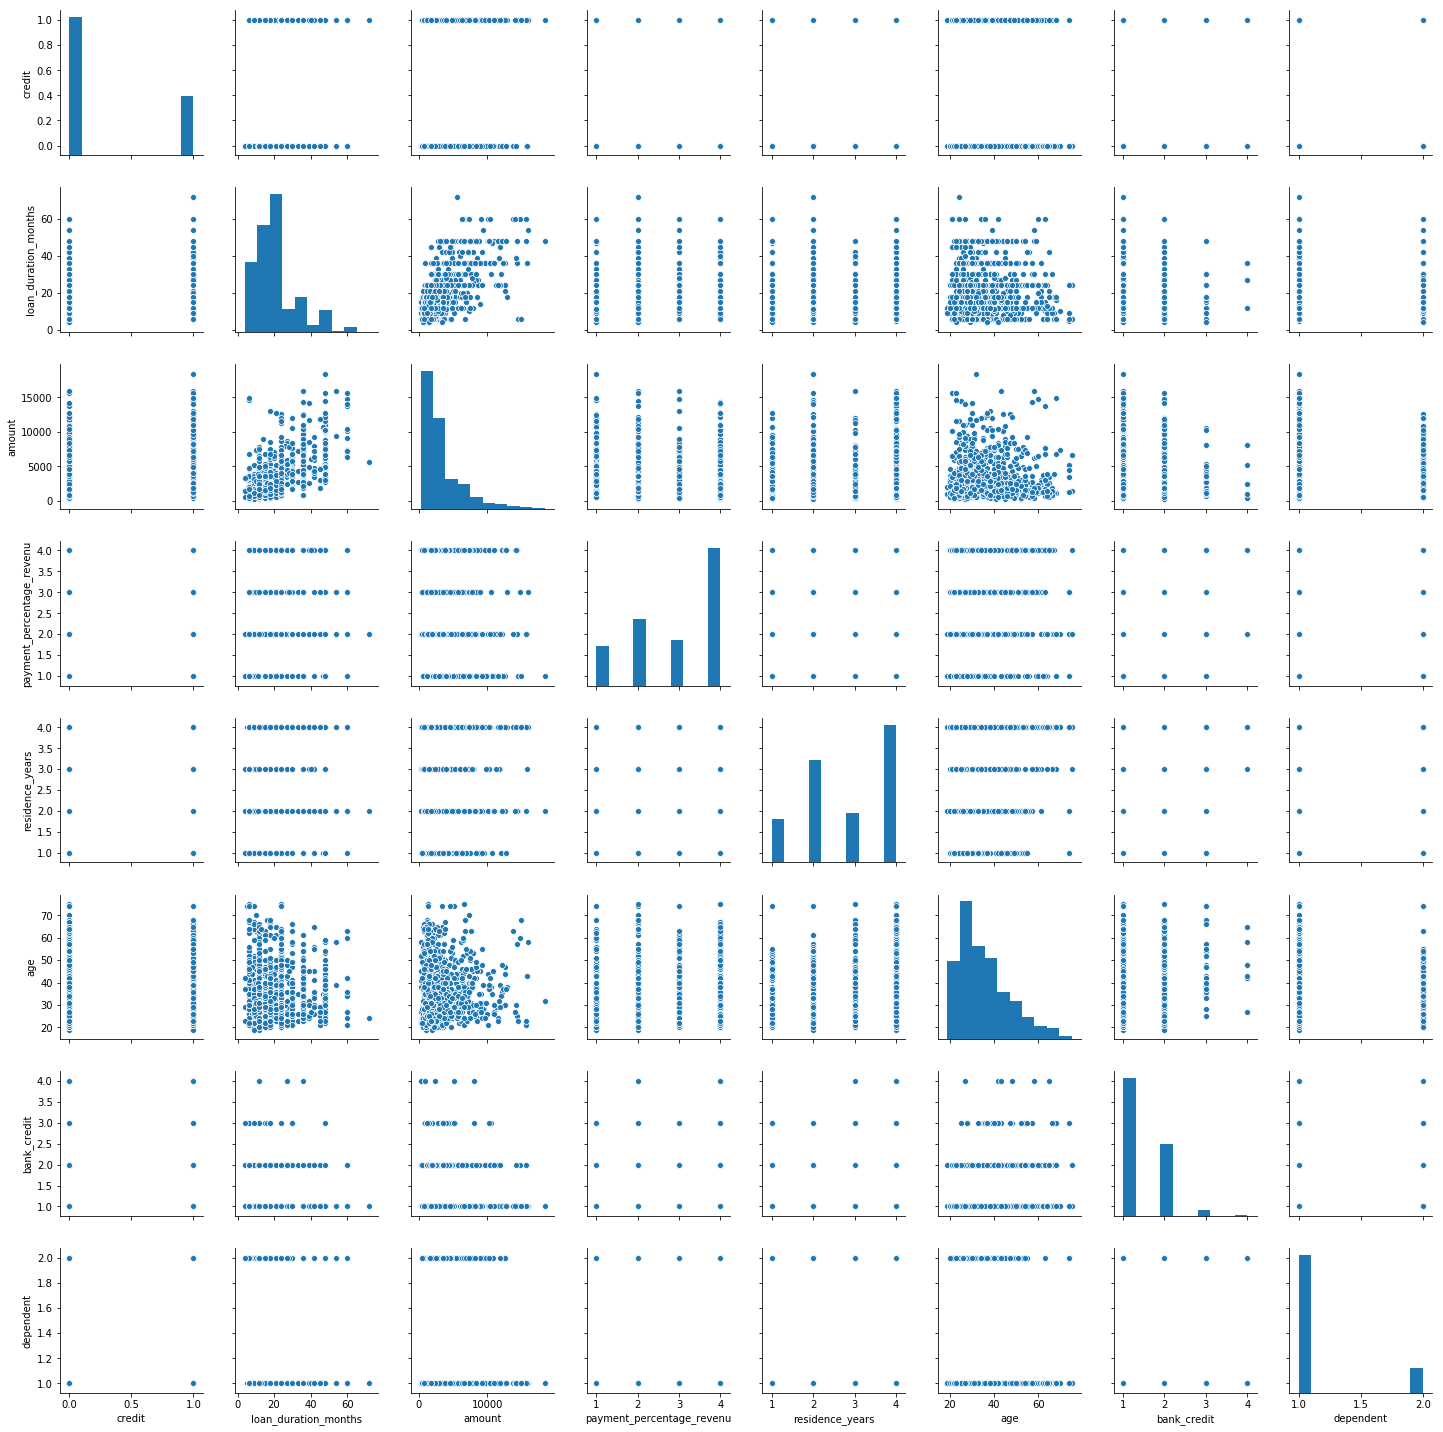

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.pairplot(df)

Text(0.5, 1.0, 'Figure 1 : Credit Count')

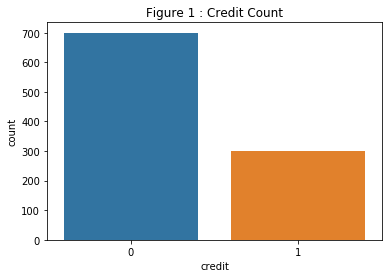

In [219]:
sns.countplot(x='credit', data=df).set_title("Figure 1 : Credit Count")

Text(0.5, 1.0, 'Figure 2 : Boxplot Number of Credit and Loan Duration')

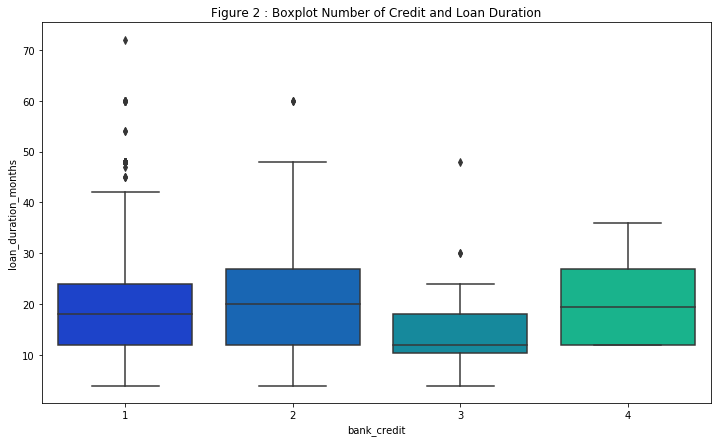

In [220]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='bank_credit',y='loan_duration_months',data=df,palette='winter').set_title("Figure 2 : Boxplot Number of Credit and Loan Duration")

Text(0.5, 1.0, 'Figure 3 : Number of Credit and Credit Fault')

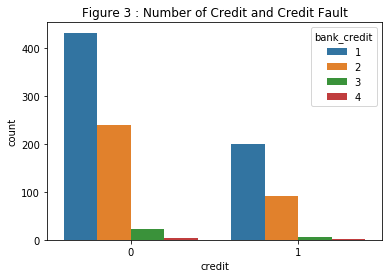

In [221]:
sns.countplot(x='credit', hue='bank_credit', data=df).set_title("Figure 3 : Number of Credit and Credit Fault")

Text(0.5, 1.0, 'Figure 4 : Dispersion of the Loan Amount')

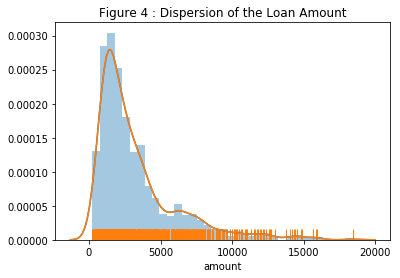

In [222]:
sns.distplot(df['amount']);
sns.distplot(df['amount'], hist=False, rug=True).set_title("Figure 4 : Dispersion of the Loan Amount")

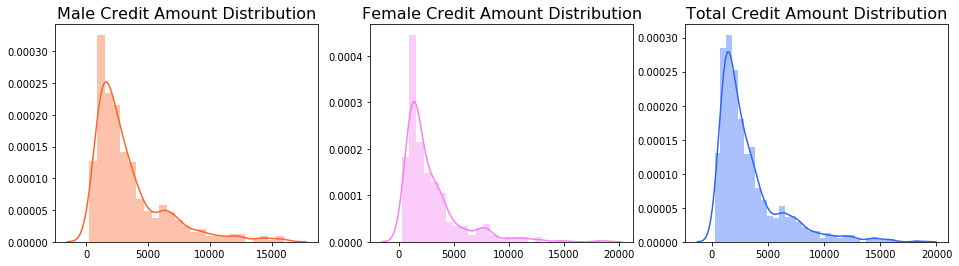

In [223]:
# Distribution of Credit_Amount for Gender

male_credit = df["amount"].loc[df["sex_marital_status"] != "female : divorced/separated/married"].values
female_credit = df["amount"].loc[df["sex_marital_status"] == "female : divorced/separated/married"].values
total_credit = df['amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Amount Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Amount Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Amount Distribution", fontsize=16)
plt.show()

In [224]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

bad_credit_amount = df["amount"].loc[df['credit'] == 1].values.tolist()
good_credit_amount = df["amount"].loc[df['credit'] == 0].values.tolist()
bad_duration = df['loan_duration_months'].loc[df['credit'] == 1].values.tolist()
good_duration = df['loan_duration_months'].loc[df['credit'] == 0].values.tolist()

bad_loans = go.Scatter(
    x = bad_duration,
    y = bad_credit_amount,
    name = 'Bad Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

good_loans = go.Scatter(
    x = good_duration,
    y = good_credit_amount,
    name = 'Good Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(34, 139, 34, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [bad_loans, good_loans]

layout = dict(title = 'Correlation of Risk with <br> Credit Amount Borrowed',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

In [99]:
import plotly.plotly as py
import plotly.figure_factory as ff


corr = df.corr()

arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Correlation'
iplot(fig, filename='annotated_heatmap')

In [225]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

df = pd.read_excel('Analyse_du_Credit.xlsx')

# -- Status_Savings_Account --
condition = df['status_savings_account'] == "< 0 $"
df['status_savings_account_zero'] = np.where(condition, 1, 0)
condition = df['status_savings_account'] == "0 <= ... < 2000 $"
df['status_savings_account_more_zero'] = np.where(condition, 1, 0)

# -- Historical Credit Status --
condition = df['historical_credit_status'] == "critical account/ other credits existing (not at this bank)"
df['critical_account'] = np.where(condition, 1, 0)

condition = df['historical_credit_status'] == "existing credits paid back duly till now"
df['existing_credit_paid_back_duly_till_now'] = np.where(condition, 1, 0)

condition = df['historical_credit_status'] == "delay in paying off in the past"
df['delay_in_paying_off'] = np.where(condition, 1, 0)

condition = df['historical_credit_status'] == "all credits at this bank paid back duly"
df['all_credit_at_this_bank_paid_back_duly_till_now'] = np.where(condition, 1, 0)

# -- Reason --
condition = df['reason'] == ("furniture/equipment" or "domestic appliances")
df['reason_domestic'] = np.where(condition, 1, 0)

condition = df['reason'] == "Radio/television"
df['reason_electronics'] = np.where(condition, 1, 0)

condition = df['reason'] == "car(new)"
df['reason_new_car'] = np.where(condition, 1, 0)

condition = df['reason'] == ("car(used)" or "repairs")
df['reason_old_car'] = np.where(condition, 1, 0)

# -- Savings --
condition = df['savings'] == "... < 1000 $"
df['savings_less_1k'] = np.where(condition, 1, 0)

condition = df['savings'] == "1000 <= ... < 5000 $"
df['savings_between_1k_5k'] = np.where(condition, 1, 0)

condition = df['savings'] == "5000 <= ... < 10000 $"
df['savings_between_5k_10k'] = np.where(condition, 1, 0)

condition = df['savings'] == ".. >= 10000 $"
df['savings_more_10k'] = np.where(condition, 1, 0)

# -- Employment Time --
condition = df['employment_time'] == "unemployed"
df['unemployed'] = np.where(condition, 1, 0)

condition = df['employment_time'] == "... < 1 year "
df['emplyment_less_1_year'] = np.where(condition, 1, 0)

condition = df['employment_time'] == "1 <= ... < 4 years"
df['employment_between_1_4_years'] = np.where(condition, 1, 0)

# -- Sex & Marital Status --
condition = df['sex_marital_status'] == "male : single"
df['male_single'] = np.where(condition, 1, 0)

condition = df['sex_marital_status'] == "male : married/widowed"
df['male_married_widowed'] = np.where(condition, 1, 0)

condition = df['sex_marital_status'] == "male : divorced/separated"
df['male_divorced_seperated'] = np.where(condition, 1, 0)

# -- Other Debtor --
debtor = pd.get_dummies(df['other_debtor'], drop_first=True)
debtor.columns = ['debtor_garantor', 'debtor_none']

# -- Property type --
df['property_type'] = np.where(df['property_type'].str.contains("real estate"), 1, 0)
property_type = pd.get_dummies(df['property_type'], 'real estate')
property_type.columns = ['property_type_other', 'property_type_real_estate']

# -- other_payment_plan_per_echelon --
other_payment_plan_per_echelon = pd.get_dummies(df['other_payment_plan_per_echelon'], drop_first=True)
other_payment_plan_per_echelon.columns = ['other_payment_none', 'other_payment_stores']

# -- Dwelling --
dwelling = pd.get_dummies(df['dwelling'], drop_first=True)
dwelling.columns = ['dwelling_owned', 'dwelling_rented']

# -- Job --
condition = df['job'] == "skilled employee / official"
df['job_skilled_employee'] = np.where(condition, 1, 0)

condition = df['job'] == "management/ self-employed/ highly qualified employee/ officer"
df['job_management_officer_etc'] = np.where(condition, 1, 0)

# -- Foreign Workers --
foreign_worker = pd.get_dummies(df['foreign_worker'], drop_first=True)
foreign_worker.columns = ['is_foreign_worker']

# Drop useless columns
df.drop(['status_savings_account', 'historical_credit_status', 'reason', 'savings', 'employment_time', 'sex_marital_status', 'other_payment_plan_per_echelon', 'other_debtor', 'job', 'foreign_worker', 'dwelling'],axis=1,inplace=True)

# Concat dummy variables
df = pd.concat([df, debtor, property_type, dwelling, foreign_worker],axis=1)

display(HTML(df.head().to_html()))



,credit,loan_duration_months,amount,payment_percentage_revenu,residence_years,property_type,age,bank_credit,dependent,status_savings_account_zero,status_savings_account_more_zero,critical_account,existing_credit_paid_back_duly_till_now,delay_in_paying_off,all_credit_at_this_bank_paid_back_duly_till_now,reason_domestic,reason_electronics,reason_new_car,reason_old_car,savings_less_1k,savings_between_1k_5k,savings_between_5k_10k,savings_more_10k,unemployed,emplyment_less_1_year,employment_between_1_4_years,male_single,male_married_widowed,male_divorced_seperated,job_skilled_employee,job_management_officer_etc,debtor_garantor,debtor_none,property_type_other,property_type_real_estate,dwelling_owned,dwelling_rented,is_foreign_worker
0,0,6,1169,4,4,1,67,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1
1,1,48,5951,2,2,1,22,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1
2,0,12,2096,2,3,1,49,1,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1
3,0,42,7882,2,4,0,45,1,2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1
4,1,24,4870,3,4,0,53,2,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1


In [226]:
df.describe()

,credit,loan_duration_months,amount,payment_percentage_revenu,residence_years,property_type,age,bank_credit,dependent,status_savings_account_zero,...,male_divorced_seperated,job_skilled_employee,job_management_officer_etc,debtor_garantor,debtor_none,property_type_other,property_type_real_estate,dwelling_owned,dwelling_rented,is_foreign_worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,0.282000,35.546000,1.407000,1.155000,0.274000,...,0.050000,0.630000,0.148000,0.052000,0.907000,0.718000,0.282000,0.713000,0.179000,0.963000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,0.450198,11.375469,0.577654,0.362086,0.446232,...,0.218054,0.483046,0.355278,0.222138,0.290578,0.450198,0.450198,0.452588,0.383544,0.188856
min,0.000000,4.000000,250.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,0.000000,27.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,0.000000,33.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,1.000000,42.000000,2.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,1.000000,75.000000,4.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [227]:
df.groupby('credit').describe()

loan_duration_months                                               \
                      count       mean        std  min   25%   50%   75%   
credit                                                                     
0                     700.0  19.207143  11.079564  4.0  12.0  18.0  24.0   
1                     300.0  24.860000  13.282639  6.0  12.0  24.0  36.0   

             amount               ... dwelling_rented      is_foreign_worker  \
         max  count         mean  ...             75%  max             count   
credit                            ...                                          
0       60.0  700.0  2985.457143  ...             0.0  1.0             700.0   
1       72.0  300.0  3938.126667  ...             0.0  1.0             300.0   

                                                     
            mean       std  min  25%  50%  75%  max  
credit                                               
0       0.952857  0.212096  0.0  1.0  1.0  1.0  1.0  
1       0.986667  0.114889  0.0  1.0  1.0  1.0  1.0  

[2 rows x 296 columns]

/home/chloe/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



              precision    recall  f1-score   support

           0       0.77      0.89      0.83       209
           1       0.62      0.40      0.48        91

   micro avg       0.74      0.74      0.74       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.74      0.72       300

AIC
65.31238915629262


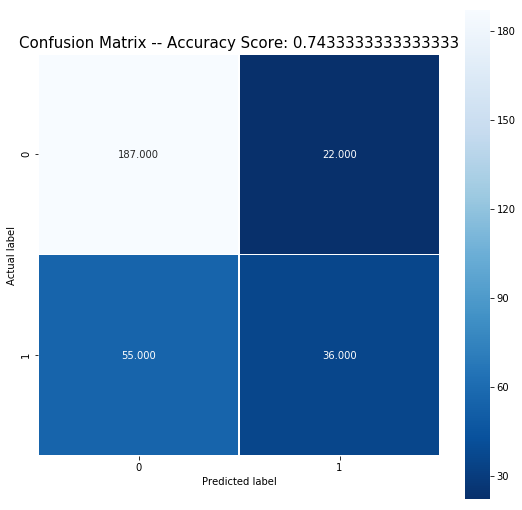

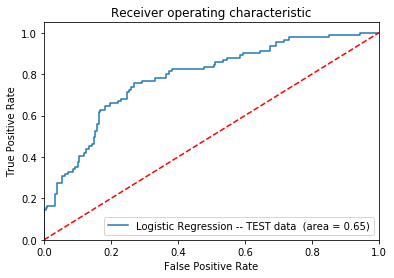

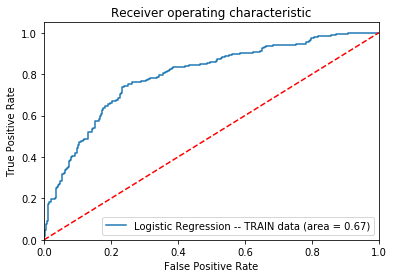

In [228]:
# First try with all variables

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import math

X_train, X_test, y_train, y_test = train_test_split(df.drop('credit',axis=1), 
                                                    df['credit'], test_size=0.30, 
                                                    random_state=42)

logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
predictions = logit_model.predict(X_test)
print(classification_report(y_test,predictions))

# Calcul du AIC avec toutes les variables
resid = y_test - predictions
sse = sum(resid**2)
k = len(df.columns) - 1
AIC= 2*k - 2*math.log(sse)
print("AIC")
print(AIC)

# Score
score = logit_model.score(X_test, y_test)

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix -- Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# ROC -- TEST data
logit_roc_auc = roc_auc_score(y_test, logit_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression -- TEST data  (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# ROC -- TRAIN data
logit_roc_auc = roc_auc_score(y_train, logit_model.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logit_model.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression -- TRAIN data (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [229]:
# SMOTE

from imblearn.over_sampling import SMOTE

data_final = df.copy()

X = data_final.loc[:, data_final.columns != 'credit']
y = data_final.loc[:, data_final.columns == 'credit']

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['credit'])

# we can check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['credit']==0]))
print("Number of subscription",len(os_data_y[os_data_y['credit']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['credit']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['credit']==1])/len(os_data_X))

length of oversampled data is  972
Number of no subscription in oversampled data 486
Number of subscription 486
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


/home/chloe/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [230]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data_final_vars = data_final.columns.values.tolist()
y=['credit']
X=[i for i in data_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

column_ranking = np.asarray(rfe.ranking_)
get_important_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
number_ones = get_indexes(1,myarray)
important_column_names = []

print("The most important variables are : ")

for i in number_ones:
    important_column_names.append(df.columns[i])
    
print(important_column_names)


The most important variables are : 
['residence_years', 'dependent', 'status_savings_account_zero', 'status_savings_account_more_zero', 'critical_account', 'existing_credit_paid_back_duly_till_now', 'delay_in_paying_off', 'savings_more_10k', 'employment_between_1_4_years', 'male_single', 'male_married_widowed', 'male_divorced_seperated', 'job_skilled_employee', 'job_management_officer_etc', 'debtor_garantor', 'debtor_none', 'property_type_other', 'property_type_real_estate', 'dwelling_owned', 'dwelling_rented']


/home/chloe/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/chloe/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/chloe/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/chloe/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/chloe/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/home/chloe/.local/lib/py

/home/chloe/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



              precision    recall  f1-score   support

           0       0.75      0.93      0.83       209
           1       0.63      0.29      0.39        91

   micro avg       0.73      0.73      0.73       300
   macro avg       0.69      0.61      0.61       300
weighted avg       0.71      0.73      0.70       300

AIC
65.23594673065224


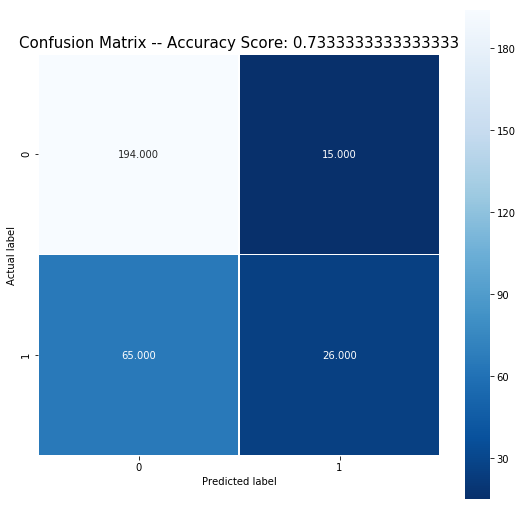

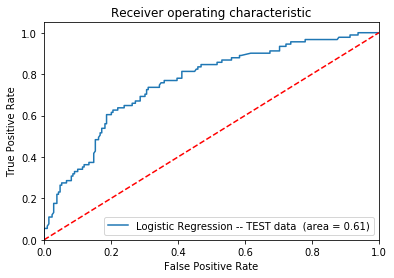

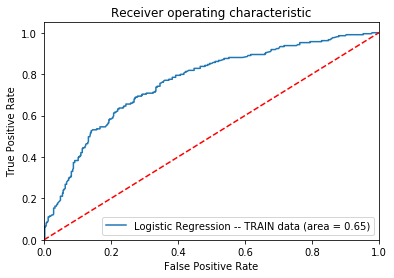

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import math

# Deuxième essai avec les variables retenues par l'élimination récursive


df_copy = df[['residence_years', 'dependent', 'status_savings_account_zero', 
               'status_savings_account_more_zero', 'critical_account', 
               'existing_credit_paid_back_duly_till_now', 'delay_in_paying_off', 
               'savings_more_10k', 'employment_between_1_4_years', 'male_single', 
               'male_married_widowed', 'male_divorced_seperated', 'job_skilled_employee', 
               'job_management_officer_etc', 'debtor_garantor', 'debtor_none', 
               'property_type_other', 'property_type_real_estate', 'dwelling_owned', 
               'dwelling_rented', 'credit']].copy();
    
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop('credit',axis=1), 
                                                    df_copy['credit'], test_size=0.30, 
                                                    random_state=42)

logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
predictions = logit_model.predict(X_test)
print(classification_report(y_test,predictions))

# Calcul du AIC avec toutes les variables
resid = y_test - predictions
sse = sum(resid**2)
k = len(df.columns) - 1
AIC= 2*k - 2*math.log(sse)
print("AIC")
print(AIC)

# Score
score = logit_model.score(X_test, y_test)

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix -- Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# ROC -- TEST data
logit_roc_auc = roc_auc_score(y_test, logit_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression -- TEST data  (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# ROC -- TRAIN data
logit_roc_auc = roc_auc_score(y_train, logit_model.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logit_model.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression -- TRAIN data (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Explication des meilleures variables

L'algorithme d'élimination récursive semble avoir trouvé des variables pertinentes pour les modèles.

En observant le AIC des deux modèles (toutes les variables vs. variables sélectionnées par l'algorithme d'élimination récursive) on remarque que celui avec les variables sélectionnées a le plus petit AIC.
Ainsi, il semble être le modèle à privilégier. Par contre, en comparant le score (accuracy) des deux modèles,
on remarque que celui avec toutes les variables possède une meilleur performance avec une marge de 1%.

Malgré que la marge de différence est très faible, les résultats sont un peu contradictoire par rapport à la norme qui est que le modèle avec le plus faible AIC est à privilégier. Cependant, nous allons continuer à explorer ces deux modèles avec d'autres fonctions de classification pour voir ce qu'il en est et comment les deux modèles évoluent.


              precision    recall  f1-score   support

           0       0.77      0.89      0.83       209
           1       0.61      0.40      0.48        91

   micro avg       0.74      0.74      0.74       300
   macro avg       0.69      0.64      0.65       300
weighted avg       0.72      0.74      0.72       300

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0]


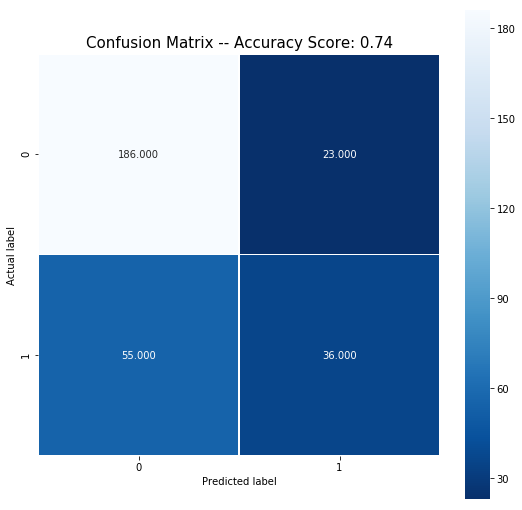

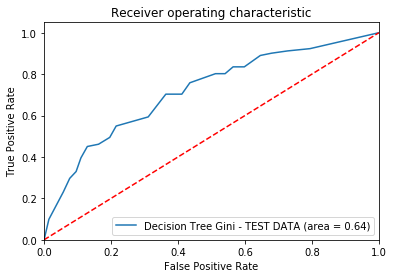

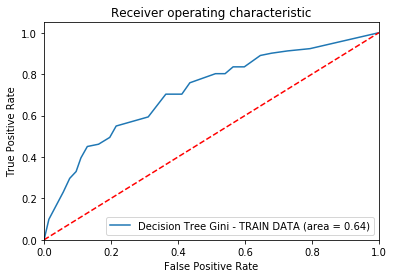

In [232]:
# Decision Tree - toutes les variables

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import math


X_train, X_test, y_train, y_test = train_test_split(df.drop('credit',axis=1), 
                                                    df['credit'], test_size=0.30, 
                                                    random_state=42)

tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42,
                               max_depth=10, min_samples_leaf=15)
tree_gini.fit(X_train, y_train)

predictions = tree_gini.predict(X_test)

print(classification_report(y_test,predictions))
print(predictions)

# Score
score = tree_gini.score(X_test, y_test)

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix -- Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# ROC -- TEST data
tree_gini_roc_auc = roc_auc_score(y_test, tree_gini.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_gini.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Gini - TEST DATA (area = %0.2f)' % tree_gini_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

# ROC -- TRAIN data
tree_gini_roc_auc = roc_auc_score(y_test, tree_gini.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_gini.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Gini - TRAIN DATA (area = %0.2f)' % tree_gini_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       209
           1       0.54      0.36      0.43        91

   micro avg       0.71      0.71      0.71       300
   macro avg       0.65      0.61      0.62       300
weighted avg       0.69      0.71      0.69       300

[0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0]


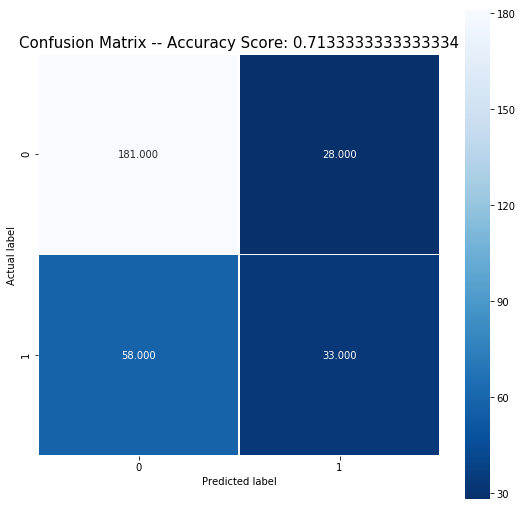

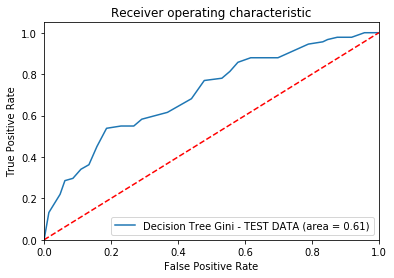

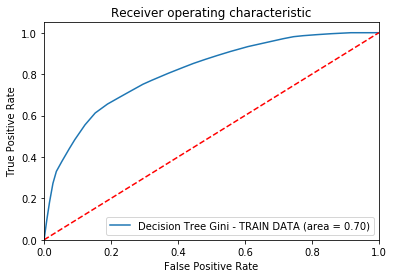

In [233]:
# Decision Tree - avec quelques varibles clé

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import math


few_variables = df[['residence_years', 'dependent', 'status_savings_account_zero', 
               'status_savings_account_more_zero', 'critical_account', 
               'existing_credit_paid_back_duly_till_now', 'delay_in_paying_off', 
               'savings_more_10k', 'employment_between_1_4_years', 'male_single', 
               'male_married_widowed', 'male_divorced_seperated', 'job_skilled_employee', 
               'job_management_officer_etc', 'debtor_garantor', 'debtor_none', 
               'property_type_other', 'property_type_real_estate', 'dwelling_owned', 
               'dwelling_rented', 'credit']].copy()


X_train, X_test, y_train, y_test = train_test_split(few_variables.drop('credit',axis=1), 
                                                    few_variables['credit'], test_size=0.30, 
                                                    random_state=42)

tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42,
                               max_depth=10, min_samples_leaf=15)
tree_gini.fit(X_train, y_train)

predictions = tree_gini.predict(X_test)

print(classification_report(y_test,predictions))
print(predictions)

# Score
score = tree_gini.score(X_test, y_test)

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix -- Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# ROC -- Test
tree_gini_roc_auc = roc_auc_score(y_test, tree_gini.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_gini.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Gini - TEST DATA (area = %0.2f)' % tree_gini_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

# ROC -- Train
tree_gini_roc_auc = roc_auc_score(y_train, tree_gini.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, tree_gini.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Gini - TRAIN DATA (area = %0.2f)' % tree_gini_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

# EXPLICATION DES DIVERGENCES

Après avoir essayer plusieurs variations de valeur de paramètre du modèle decision tree, nous avons conclu que d'avoir le min_samples_leaf à 15 et le max_depth à 10 nous donnait les meilleurs résultats. Nous avons gardé le random_state de toutes les varibles (incluant le modèle Logit) à 42 par soucis de constance.


### Comparaison variables - Logit vs Decision Tree avec Gini

Dans le cas du decision tree, les variables trouvées par l'algorithme d'élimination récursive n'obtiennent toujours pas un meilleur résultat que le modèle avec toutes les variables. Par contre, le grand changement est que son ROC avec les training data est à 70, ce qui est un très bon score. Ainsi, ce modèle a possiblement beaucoup de potentiel par rapport aux autres. Il faudrait tester avec plus de data pour conclure davantage.

### Classifier à privilégier
À ce stade ci, le classifier qui a eu le plus de succès est le modèle logit avec toutes les variables. C'est ce modèle qui a obtenu le plus haut score d'accuracy (74.3%) en plus d'avoir le deuxièmes meilleur ROC (0.67 avec les variables de training). 
Il est toutefois à noter que certains autres essais ont obtenu des résultats similaires (0.61, 0.64, etc.).

## Divergence des deux modèles

Il se peut que le modèle logit fonctionne mieux puisqu'il s'agit d'un problème de séparation linéaire. Ce type de problème/données obtient généralement de bons résultats avec un classifier Logit.

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       209
           1       0.70      0.36      0.48        91

   micro avg       0.76      0.76      0.76       300
   macro avg       0.74      0.65      0.66       300
weighted avg       0.75      0.76      0.73       300

[0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 0]


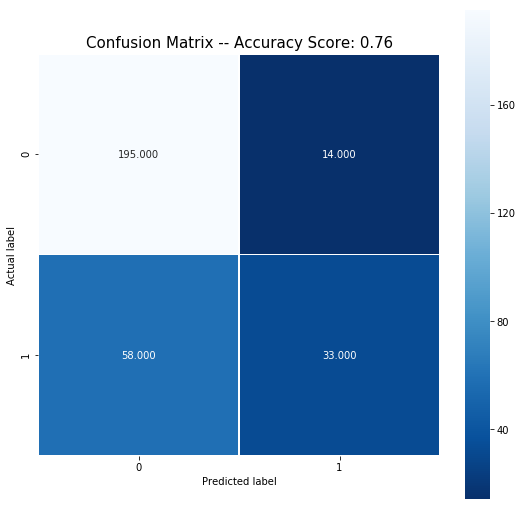

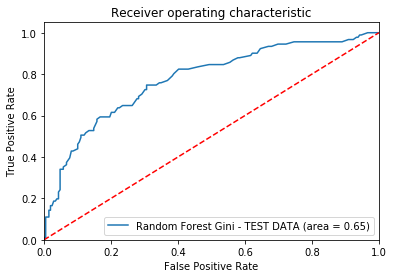

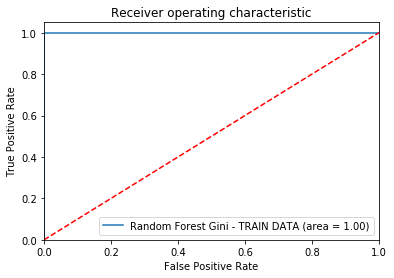

Feature ranking:
1. feature amount (0.154390)
2. feature age (0.124560)
3. feature loan_duration_months (0.106424)
4. feature status_savings_account_zero (0.059120)
5. feature payment_percentage_revenu (0.051558)
6. feature residence_years (0.049067)
7. feature critical_account (0.033673)
8. feature status_savings_account_more_zero (0.032052)
9. feature savings_less_1k (0.030683)
10. feature bank_credit (0.029361)
11. feature male_single (0.026589)
12. feature job_skilled_employee (0.024970)
13. feature dwelling_owned (0.024950)
14. feature employment_between_1_4_years (0.024644)
15. feature emplyment_less_1_year (0.021567)
16. feature existing_credit_paid_back_duly_till_now (0.020169)
17. feature job_management_officer_etc (0.017198)
18. feature debtor_none (0.016251)
19. feature dependent (0.015689)
20. feature all_credit_at_this_bank_paid_back_duly_till_now (0.015242)
21. feature unemployed (0.014551)
22. feature dwelling_rented (0.014091)
23. feature delay_in_paying_off (0.011951)


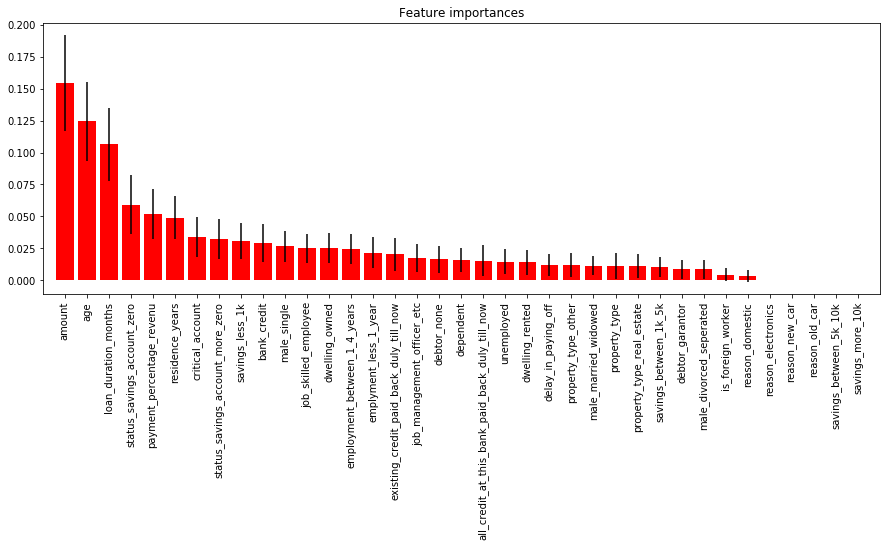

In [234]:
# Random Forest - - toutes les variables

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import math


X_train, X_test, y_train, y_test = train_test_split(df.drop('credit',axis=1), 
                                                    df['credit'], test_size=0.30, 
                                                    random_state=42)

randomForest = RandomForestClassifier(n_estimators=200, max_depth=200,
                              random_state=42)

randomForest.fit(X_train, y_train)

predictions = randomForest.predict(X_test)

print(classification_report(y_test,predictions))
print(predictions)

# Score
score = randomForest.score(X_test, y_test)

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix -- Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# ROC -- Test
random_forest_gini_roc_auc = roc_auc_score(y_test, randomForest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, randomForest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Gini - TEST DATA (area = %0.2f)' % random_forest_gini_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

# ROC -- Train
random_forest_gini_roc_auc = roc_auc_score(y_train, randomForest.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, randomForest.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Gini - TRAIN DATA (area = %0.2f)' % random_forest_gini_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

importances = randomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomForest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
x_axis_labels = []
features = list(df.columns.values)
features.pop(0)

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
    x_axis_labels.append(features[indices[f]])

# Plot the feature importances of the forest
plt.figure(figsize=[15, 5])
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), x_axis_labels, rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       209
           1       0.46      0.38      0.42        91

   micro avg       0.68      0.68      0.68       300
   macro avg       0.61      0.59      0.60       300
weighted avg       0.66      0.68      0.67       300

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 0 1 1]


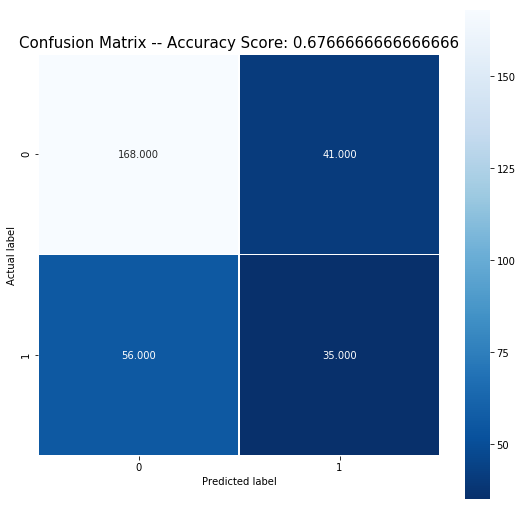

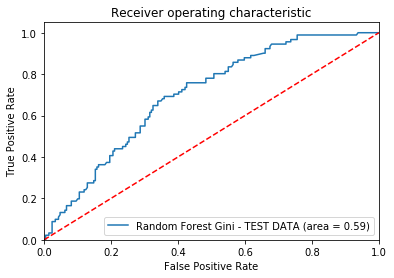

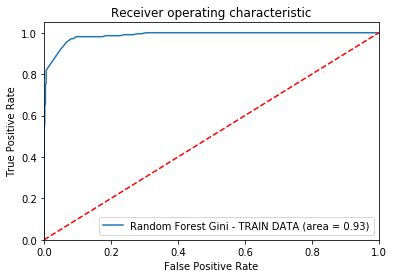

Feature ranking:
1. feature residence_years (0.170161)
2. feature status_savings_account_zero (0.094704)
3. feature status_savings_account_more_zero (0.075401)
4. feature employment_between_1_4_years (0.073280)
5. feature male_single (0.063604)
6. feature job_skilled_employee (0.061062)
7. feature critical_account (0.060890)
8. feature existing_credit_paid_back_duly_till_now (0.056026)
9. feature dwelling_owned (0.046240)
10. feature job_management_officer_etc (0.040835)
11. feature dependent (0.040316)
12. feature debtor_none (0.038044)
13. feature delay_in_paying_off (0.033574)
14. feature male_married_widowed (0.029370)
15. feature dwelling_rented (0.028339)
16. feature property_type_real_estate (0.025026)
17. feature property_type_other (0.024847)
18. feature male_divorced_seperated (0.022129)
19. feature debtor_garantor (0.016151)
20. feature savings_more_10k (0.000000)


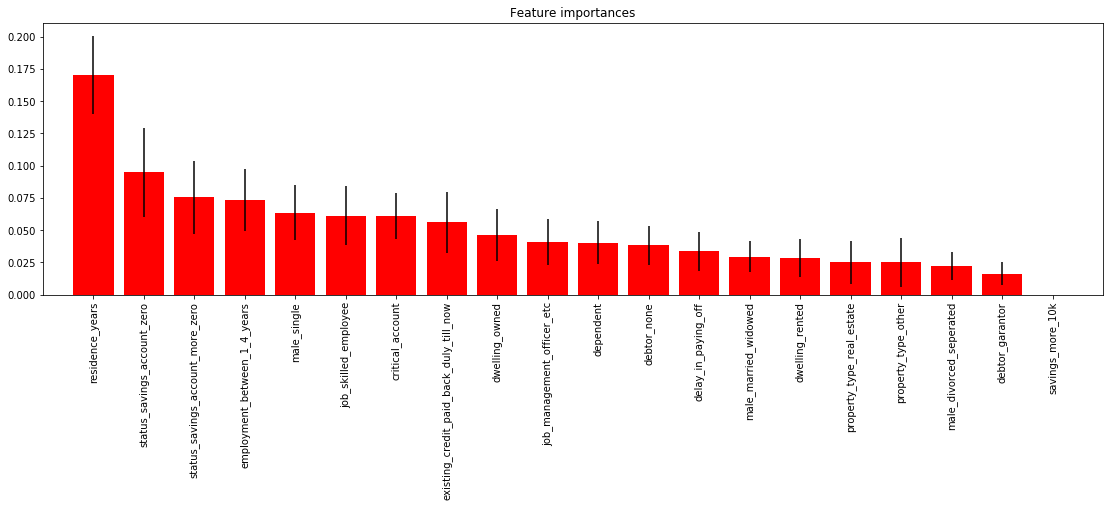

In [235]:
# Random Forest - - avec quelques varibles clé

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.base import clone 
import math

few_variables = df[['residence_years', 'dependent', 'status_savings_account_zero', 
               'status_savings_account_more_zero', 'critical_account', 
               'existing_credit_paid_back_duly_till_now', 'delay_in_paying_off', 
               'savings_more_10k', 'employment_between_1_4_years', 'male_single', 
               'male_married_widowed', 'male_divorced_seperated', 'job_skilled_employee', 
               'job_management_officer_etc', 'debtor_garantor', 'debtor_none', 
               'property_type_other', 'property_type_real_estate', 'dwelling_owned', 
               'dwelling_rented', 'credit']].copy()

X_train, X_test, y_train, y_test = train_test_split(few_variables.drop('credit',axis=1), 
                                                    few_variables['credit'], test_size=0.30, 
                                                    random_state=42)

randomForest = RandomForestClassifier(n_estimators=200, max_depth=200,
                              random_state=0)

randomForest.fit(X_train, y_train)

predictions = randomForest.predict(X_test)

print(classification_report(y_test,predictions))
print(predictions)

# Score
score = randomForest.score(X_test, y_test)

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix -- Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# ROC -- Test
random_forest_gini_roc_auc = roc_auc_score(y_test, randomForest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, randomForest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Gini - TEST DATA (area = %0.2f)' % random_forest_gini_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

# ROC -- Train
random_forest_gini_roc_auc = roc_auc_score(y_train, randomForest.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, randomForest.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Gini - TRAIN DATA (area = %0.2f)' % random_forest_gini_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

features = ['residence_years', 'dependent', 'status_savings_account_zero', 
            'status_savings_account_more_zero', 'critical_account', 
            'existing_credit_paid_back_duly_till_now', 'delay_in_paying_off', 
            'savings_more_10k', 'employment_between_1_4_years', 'male_single', 
            'male_married_widowed', 'male_divorced_seperated', 'job_skilled_employee', 
            'job_management_officer_etc', 'debtor_garantor', 'debtor_none', 
            'property_type_other', 'property_type_real_estate', 'dwelling_owned', 
            'dwelling_rented', 'credit']
importances = randomForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in randomForest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]
x_axis_labels = []
# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
    x_axis_labels.append(features[indices[f]])

# Plot the feature importances of the forest
plt.figure(figsize=[19, 5])
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), x_axis_labels, rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.show()


## Explication des meilleures variables

Les résulats indiquent qu'encore une fois, le meilleur modèle est celui avec toutes les varibles et non celui avec les variables éliminé récursivement. Cependant, on remarque que sur les 37 variables du modèle, il y en a 5 qui ne sont pas utils (feature reason_electronics, feature reason_new_car, feature reason_old_car, feature savings_between_5k_10k, feature savings_more_10k). Cette dernière se retrouve aussi avec un score de 0.00 dans notre second modèle à moins de variable. 

En regardant ces 5 variables avec aucun impact, on remarque qu'il s'agit de catégorie de 'raison d'un prêt'. Ainsi, la raison d'un prêt ne semble pas avoir d'importance sur les risques de défaut de paiement du crédit. Les autres variables font parti de la catégorie 'Montant d'épargne'. Il s'agit de catégorie à montants substentiels. Ainsi, un individu avec beaucoup d'épargne est moins susceptible d'être en défaut de paiement, ce qui semble bien évident et donc nos résultats semblent cohérents.

On remarque que l'importance des variables entre les 2 modèles sont similaire, mais n'apparaîssent pas dans le même ordre. Par exemple, residence_years est le facteur numéro 1 dans notre modèle à moins de variable, mais se retrouve en 6e position dans notre modèle avec toutes les variables.

Un fait important à noter avec ce classificateur est qu'il est celui avec un des pires score d'accuracy, mais il s'agit du meilleur classificateur en terme de courbe ROC du training data. Alors, il est possible qu'avec plus de data, le modèle soit en mesure de mieux classer le test data.


# Sélection de variable pour les prochains algorithmes

Pour les prochaines sections, nous avons choisi de retenir les 20 premières variables du modèle Random Forest testé avec toutes les variables. Il s'agit donc des 20 variables les plus pertinentes sur un total de 37. 

1. feature amount (0.151034)
2. feature age (0.120030)
3. feature loan_duration_months (0.108575)
4. feature status_savings_account_zero (0.064480)
5. feature payment_percentage_revenu (0.052127)
6. feature residence_years (0.049769)
7. feature status_savings_account_more_zero (0.034736)
8. feature savings_less_1k (0.032910)
9. feature bank_credit (0.028540)
10. feature critical_account (0.027082)
11. feature job_skilled_employee (0.026977)
12. feature male_single (0.025685)
13. feature employment_between_1_4_years (0.022066)
14. feature dwelling_owned (0.020568)
15. feature emplyment_less_1_year (0.019408)
16. feature existing_credit_paid_back_duly_till_now (0.019130)
17. feature all_credit_at_this_bank_paid_back_duly_till_now (0.019000)
18. feature job_management_officer_etc (0.018594)
19. feature dwelling_rented (0.016747)
20. feature dependent (0.016100)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       209
           1       0.62      0.36      0.46        91

   micro avg       0.74      0.74      0.74       300
   macro avg       0.69      0.63      0.64       300
weighted avg       0.72      0.74      0.72       300

[0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 0 0 0 1]


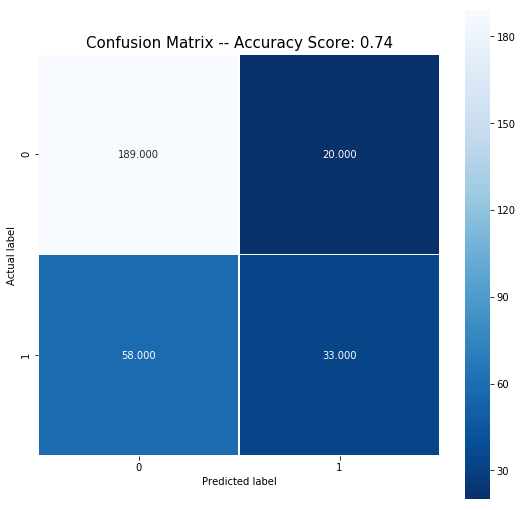

In [236]:
## SVM Linéaire avec quelques variables

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
import math


few_variables = df[['credit', 'amount', 'age', 'loan_duration_months', 'status_savings_account_zero', 
 'payment_percentage_revenu', 'residence_years', 'status_savings_account_more_zero', 'savings_less_1k',
'bank_credit', 'critical_account', 'job_skilled_employee', 'male_single', 
 'employment_between_1_4_years', 'dwelling_owned', 'emplyment_less_1_year',
 'existing_credit_paid_back_duly_till_now', 'all_credit_at_this_bank_paid_back_duly_till_now', 
'job_management_officer_etc', 'dwelling_rented', 'dependent']].copy()

X_train, X_test, y_train, y_test = train_test_split(few_variables.drop('credit',axis=1), 
                                                    few_variables['credit'], test_size=0.30, 
                                                    random_state=42)
clf = LinearSVC(dual=False, max_iter=90000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(classification_report(y_test,predictions))
print(predictions)

# Score
score = clf.score(X_test, y_test)

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix -- Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


              precision    recall  f1-score   support

           0       0.71      1.00      0.83       209
           1       1.00      0.05      0.10        91

   micro avg       0.71      0.71      0.71       300
   macro avg       0.85      0.53      0.47       300
weighted avg       0.80      0.71      0.61       300

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


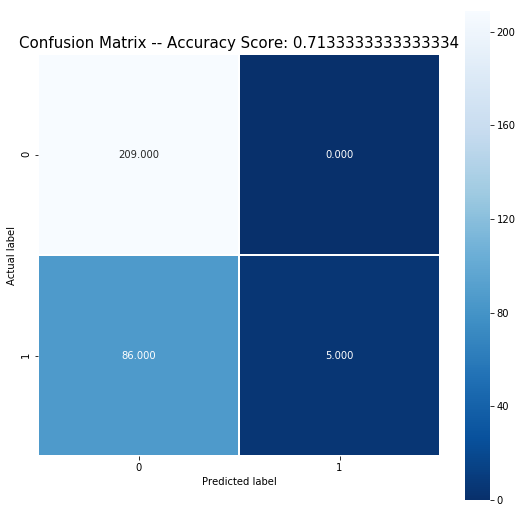

In [237]:
## SVM Radial avec quelques variables

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
import math


few_variables = df[['credit', 'amount', 'age', 'loan_duration_months', 'status_savings_account_zero', 
 'payment_percentage_revenu', 'residence_years', 'status_savings_account_more_zero', 'savings_less_1k',
'bank_credit', 'critical_account', 'job_skilled_employee', 'male_single', 
 'employment_between_1_4_years', 'dwelling_owned', 'emplyment_less_1_year',
 'existing_credit_paid_back_duly_till_now', 'all_credit_at_this_bank_paid_back_duly_till_now', 
'job_management_officer_etc', 'dwelling_rented', 'dependent']].copy()

X_train, X_test, y_train, y_test = train_test_split(few_variables.drop('credit',axis=1), 
                                                    few_variables['credit'], test_size=0.30, 
                                                    random_state=42)
clf = SVC(C=1.0, kernel='rbf', 
          degree=3, gamma='scale', 
          coef0=0.0, shrinking=True, probability=False, 
          tol=0.001, cache_size=200, class_weight=None, 
          verbose=False, max_iter=-1, decision_function_shape='ovr', 
          random_state=42)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Score
score = clf.score(X_test, y_test)

print(classification_report(y_test,predictions))
print(predictions)

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix -- Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


              precision    recall  f1-score   support

           0       0.72      0.97      0.83       209
           1       0.70      0.15      0.25        91

   micro avg       0.72      0.72      0.72       300
   macro avg       0.71      0.56      0.54       300
weighted avg       0.72      0.72      0.65       300

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0]


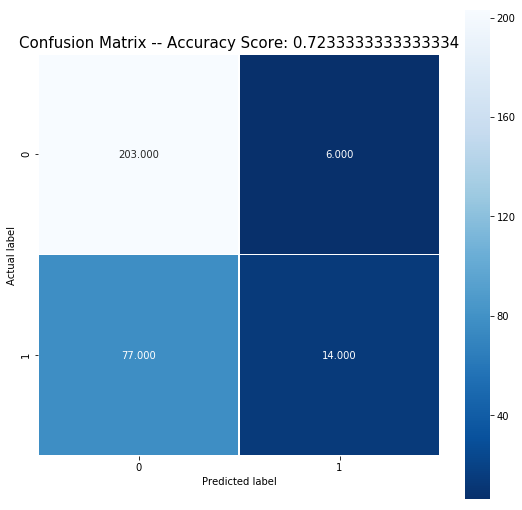

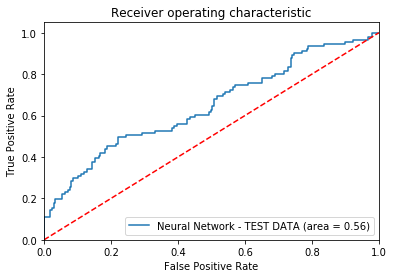

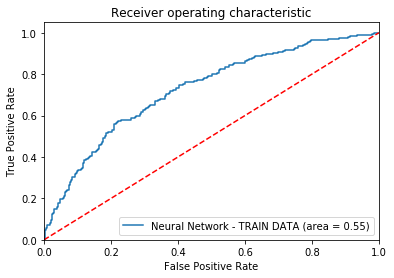

In [238]:
## Réseau de Neurone avec quelques variables

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import math

few_variables = df[['credit', 'amount', 'age', 'loan_duration_months', 'status_savings_account_zero', 
 'payment_percentage_revenu', 'residence_years', 'status_savings_account_more_zero', 'savings_less_1k',
'bank_credit', 'critical_account', 'job_skilled_employee', 'male_single', 
 'employment_between_1_4_years', 'dwelling_owned', 'emplyment_less_1_year',
 'existing_credit_paid_back_duly_till_now', 'all_credit_at_this_bank_paid_back_duly_till_now', 
'job_management_officer_etc', 'dwelling_rented', 'dependent']].copy()

X_train, X_test, y_train, y_test = train_test_split(few_variables.drop('credit',axis=1), 
                                                    few_variables['credit'], test_size=0.30, 
                                                    random_state=42)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(250,), learning_rate='constant', random_state=1)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(classification_report(y_test,predictions))
print(predictions)

# Score
score = clf.score(X_test, y_test)

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix -- Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# ROC -- Test
neural_network_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Neural Network - TEST DATA (area = %0.2f)' % neural_network_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

# ROC -- Train
neural_network_roc_auc = roc_auc_score(y_train, clf.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Neural Network - TRAIN DATA (area = %0.2f)' % neural_network_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Tree_ROC')
plt.show()

# Sélection du modèle

Les 3 derniers modèles évalués sont SVM linéaire, SVM radial et le modèle de neurone. ENcore une fois, nous avons jouer avec les paramètres de chacun dans le but d'obtenir le meilleur résultat.

Le modèle retenu est SVM Linéaire et ce parce que sont score d'accuracy est le meilleur des 3, à 74%.

Il semble que nos données soient définitivement fait pour être prédit avec un modèle de type linéaire puisque nos deux meilleures estimations proviennent de ce type de modèle.



# Conclusion

En conclusion, nos résultats sont satisfaisants. Un score autour entre 70 et 75% n'est pas mal considérant que les calculs ont été faits sur 1000 échantillons uniquement. Dans tous les cas, ce laboratoire nous a permis d'explorer les différents modèles de prédictions en machine learning. Nous avons pu voir comment explorer les données et par la suite les évaluer en jouant avec les modèles et leurs différents paramètres.

Augustin Commun
Chloé Constantineau